## Ridge

The L2 norm refers to the root result of the sum of the squares of the elements in the matrix. The principle of regularization with L2 norm is to minimize each element of the parameter matrix so that it is infinitely close to 0 but not equal to 0 like L1 regulation.

The linear regression loss function with L2 regularization added is shown below. The first term is the MSE loss, and the second term is the L2 regularization term.
$$
\text{min}\frac{1}{N}\sum ^{N}_{i=1}L(y_{i}, f(x_{i}))+ \frac{\lambda}{2} ||w||^{2}
$$

L2 regularization is simpler to compute gradients than L1 regularization, directly taking the derivative of the loss function with respect to $w$. This regression model based on L2 regularization is the Ridge Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = np.genfromtxt('data.dat', delimiter = ',')
x = data[:,0:100]
y = data[:,100].reshape(-1, 1)
# add a column
X = np.column_stack((np.ones((x.shape[0], 1)), x))

# split training and test set
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 101) (70, 1) (31, 101) (31, 1)


In [3]:
# initialize the parameter
def initialize(dims):
    w = np.zeros((dims, 1)) 
    b=0
    return w, b

In [9]:
# define ridge loss function
def l2_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # model function
    y_hat = np.dot(X, w) + b
    # loss function
    loss = np.sum((y_hat-y)**2)/num_train + alpha*np.sum(np.square(w))
    # partial derivatives of parameters
    dw = np.dot(X.T, (y_hat-y))/num_train + 2*alpha*w
    db = np.sum((y_hat-y)) / num_train
    return y_hat, loss, dw, db

In [7]:
# define training process
def ridge_train(X, y, learning_rate=0.01, epochs=300):
    w, b = initialize(X.shape[1])
    loss_list = []
    for i in range(1, epochs):
        # calculate the current estimation, loss, and partial derivatives
        y_hat, loss, dw, db = l2_loss(X, y, w ,b, 0.1)
        loss_list.append(loss)
        # update parameters based on gradient descent
        w += -learning_rate * dw
        b += -learning_rate * db

        if i % 100 == 0:
            print('epoch %d loss %f' % (i, loss))

        # save parameters
        params = {'w':w, 'b':b}
        # save gradient
        grads = {'dw':dw, 'db':db}

    return loss_list, loss, params, grads

In [27]:
loss_list, loss, params, grads = ridge_train(X_train, y_train, 0.01, 1000)

epoch 100 loss 1.272892
epoch 200 loss 0.918566
epoch 300 loss 0.824857
epoch 400 loss 0.786619
epoch 500 loss 0.767618
epoch 600 loss 0.757040
epoch 700 loss 0.750696
epoch 800 loss 0.746687
epoch 900 loss 0.744053


In [13]:
# define prediction function
def predict(X, params): 
        w = params['w']
        b = params['b']
        y_pred = np.dot(X, w) + b 
        return y_pred

In [15]:
y_pred = predict(X_test, params)
print(y_pred[:5], y_test[:5])

[[-0.07363409]
 [-2.23904964]
 [ 1.35392332]
 [-2.21912506]
 [-2.56515114]] [[ 0.24671]
 [-4.25711]
 [ 2.38642]
 [-1.87815]
 [-3.41362]]


In [16]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-0.6338800998887388

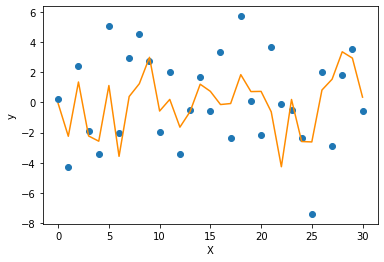

In [17]:
# plot the prediction and actual data
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can see that the model predictions fit the high and low values poorly, but fit most values. Such a model has relatively strong generalization ability and will not cause serious overfitting problems.

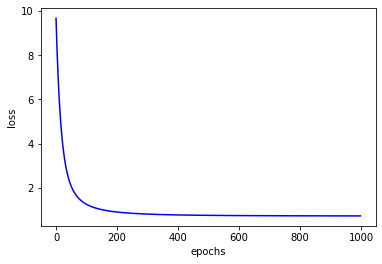

In [29]:
# plot the decline of loss during the training
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [25]:
# ridge in sklearn
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
print("sklearn Ridge intercept :", clf.intercept_)
print("\nsklearn Ridge coefficients :\n", clf.coef_)

sklearn Ridge intercept : [-0.40576153]

sklearn Ridge coefficients :
 [[ 0.00000000e+00 -2.01786172e-01  5.45135248e-01  3.28370796e-01
   7.88208577e-02  8.63329630e-01 -1.28629181e-01  8.98548367e-01
  -4.15384520e-01  1.58905870e-01 -2.93807956e-02  6.32380717e-01
   4.21771945e-02  9.24308741e-01  1.20277300e-01 -3.85333806e-01
   1.63068579e-01  3.98963430e-01 -2.55902692e-02  8.88008417e-01
   3.69510302e-02  5.63702626e-04 -1.74758205e-01  4.51826721e-01
  -7.30107159e-02 -1.35017481e-01  5.39686001e-02 -4.02425081e-03
  -6.07507156e-02  3.75631827e-01  8.57162815e-02  1.45771573e-01
   1.44022204e-01  1.98972072e-01 -1.74729670e-01 -4.55411141e-02
   2.10931708e-01 -4.20589474e-02 -1.16955409e-01 -3.48704701e-01
   9.24987738e-02 -3.59919666e-02  3.12791851e-02  9.89341477e-02
  -3.20373964e-02  5.01884867e-04  2.52601261e-02 -1.43870413e-01
  -2.01630343e-01 -2.04659068e-02  1.39960583e-01 -2.40332862e-01
   1.64551174e-01  1.05411007e-02 -1.27446721e-01 -8.05713152e-02
   3.